# Analysis Battle for 3rd

In [48]:
import pandas as pd

In [49]:
df = pd.read_csv("constructor_season_development.csv")

In [69]:
df.head()

position  points  wins  year  round          name  constructorId  \
0         9       1     0  2020      4  Haas F1 Team            210   
1         2      78     0  2020      4      Red Bull              9   
2        10       0     0  2020      4      Williams              3   
3         8       2     0  2020      4    Alfa Romeo             51   
4         6      32     0  2020      4       Renault              4   

                name.1  
0  Silverstone Circuit  
1  Silverstone Circuit  
2  Silverstone Circuit  
3  Silverstone Circuit  
4  Silverstone Circuit

In [70]:
# Create new dataframe with matched rounds per team name and assigned points
df_neu = df.pivot(index='round', columns='name', values='points')
df_neu.to_csv("Output/constructor_points_per_round.csv")
df_neu

name   Alfa Romeo  AlphaTauri  Ferrari  Haas F1 Team  McLaren  Mercedes  \
round                                                                     
1               2           6       19             0       26        37   
2               2           7       19             0       39        80   
3               2           7       27             1       41       121   
4               2          13       43             1       51       146   
5               2          14       55             1       53       180   
6               2          16       61             1       62       221   
7               2          20       61             1       68       264   
8               2          47       61             1       98       281   
10              4          59       74             1      106       366   
11              5          67       80             3      116       391   
13              8          89      103             3      134       479   
14              8          89      130             3      149       504   

name   Racing Point  Red Bull  Renault  Williams  
round                                             
1                 8         0        4         0  
2                22        27        8         0  
3                40        55       12         0  
4                42        78       32         0  
5                41       113       36         0  
6                63       135       36         0  
7                66       158       59         0  
8                82       158       71         0  
10              104       192       99         0  
11              120       211      114         0  
13              134       226      135         0  
14              154       240      136         0

## Plot and save Graphs

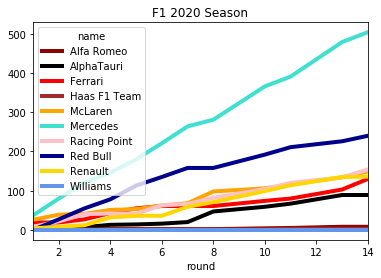

In [52]:
# Save fig 1
fig1 = df_neu.plot(
    color=['darkred', 'black', 'red', 'brown', 'orange', 'turquoise', 'pink', 'darkblue', 'gold', 'cornflowerblue'],
    title='F1 2020 Season',
    linewidth=4).get_figure()

fig1.savefig('Output/2020_full.png')

## Reduce to the 4 relevant teams

In [53]:
# Delete irrelevant columns for Battle for 3rd
df_reduced = df_neu.drop(['Alfa Romeo', 'AlphaTauri', 'Haas F1 Team', 'Mercedes', 'Red Bull', 'Williams'], axis=1)

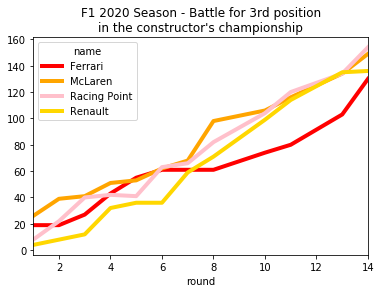

In [54]:
# Save fig 2
fig2 = df_reduced.plot(
    color=['red', 'orange', 'pink', 'gold'], 
    title="F1 2020 Season - Battle for 3rd position\nin the constructor's championship",
    linewidth=4).get_figure()

fig2.savefig('Output/2020_reduced.png')

# Display 2019 Values

In [55]:
df_2019 = pd.read_csv("2019_constructor_points.csv")

In [56]:
df_2019.head()

position  points  wins  year  round          name  constructorId  \
0         5       6     0  2019      1       Renault              4   
1         4       8     0  2019      1  Haas F1 Team            210   
2         2      22     0  2019      1       Ferrari              6   
3         3      15     0  2019      1      Red Bull              9   
4         1      44     1  2019      1      Mercedes            131   

                           name.1  
0  Albert Park Grand Prix Circuit  
1  Albert Park Grand Prix Circuit  
2  Albert Park Grand Prix Circuit  
3  Albert Park Grand Prix Circuit  
4  Albert Park Grand Prix Circuit

In [57]:
# Create new dataframe with matched rounds per team name and assigned points
df_2019_neu = df_2019.pivot(index='round', columns='name', values='points')
df_2019_neu.head()

name   Alfa Romeo  Ferrari  Haas F1 Team  McLaren  Mercedes  Racing Point  \
round                                                                       
1               4       22             8        0        44             2   
2              10       48             8        8        87             3   
3              12       73             8        8       130             7   
4              13       99             8       18       173            17   
5              13      121            15       22       217            17   

name   Red Bull  Renault  Toro Rosso  Williams  
round                                           
1            15        6           1         0  
2            31        6           3         0  
3            52       12           4         0  
4            64       12           4         0  
5            87       12           6         0

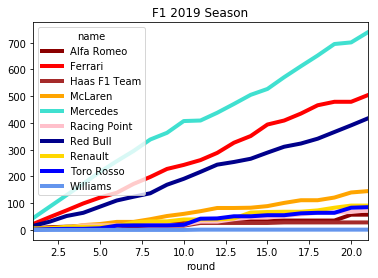

In [58]:
# Save fig 3
fig3 = df_2019_neu.plot(
    color=['darkred', 'red', 'brown', 'orange', 'turquoise', 'pink', 'darkblue', 'gold', 'blue','cornflowerblue'],
    title='F1 2019 Season',
    linewidth=4).get_figure()

fig3.savefig('Output/2019_full.png')

In [59]:
# Delete irrelevant columns for Battle for 3rd
df_2019_reduced = df_2019_neu.drop(['Alfa Romeo', 'Toro Rosso', 'Haas F1 Team', 'Mercedes', 'Red Bull', 'Williams'], axis=1)

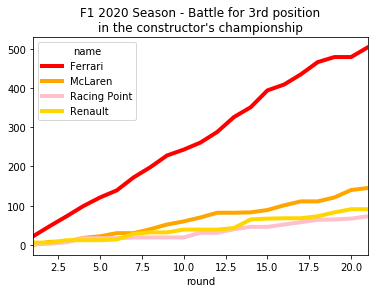

In [60]:
# Save fig 4
fig4 = df_2019_reduced.plot(
    color=['red', 'orange', 'pink', 'gold'], 
    title="F1 2020 Season - Battle for 3rd position\nin the constructor's championship",
    linewidth=4).get_figure()

fig4.savefig('Output/2019_reduced.png')

# Delta after Race #14

In [121]:
compare = pd.DataFrame()
compare['2019'] = df_2019_reduced.iloc[13]

In [122]:
compare['2020'] = df_reduced.iloc[11]

In [123]:
compare

2019  2020
name                    
Ferrari        351   130
McLaren         83   149
Racing Point    46   154
Renault         65   136

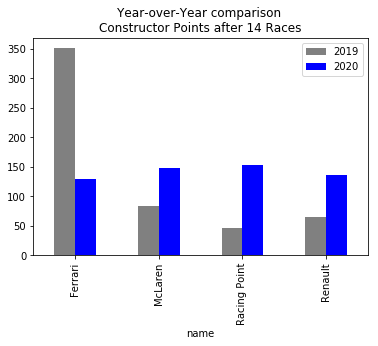

In [124]:
# Save fig 5
fig5 = compare.plot(
    kind='bar',
    color=['grey', 'blue'], 
    title="Year-over-Year comparison \nConstructor Points after 14 Races",
    linewidth=4).get_figure()

fig5.savefig('Output/compare_points.png')

In [105]:
compare['percentage'] = round((compare['2020'] / compare['2019'] - 1)*100, 2)

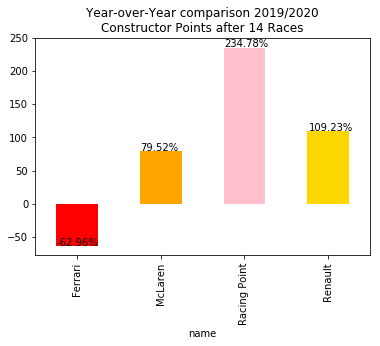

In [119]:
ax = compare['percentage'].plot(
    kind='bar',
    color=['red', 'orange', 'pink', 'gold'], 
    title="Year-over-Year comparison 2019/2020\nConstructor Points after 14 Races",
    linewidth=4)
for p in ax.patches:
    ax.annotate(str(p.get_height()) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

fig6 = ax.get_figure()
fig6.savefig('Output/compare_percentage.png')